### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [114]:
df_quatro_lojas = df_total.drop_duplicates(subset=["Preço"]).head(4)
faturamento_quatro_lojas = df_quatro_lojas["Preço"].sum()

print(f"O faturamento total das 4 primeiras lojas é: R$ {faturamento_quatro_lojas:.2f}")

O faturamento total das 4 primeiras lojas é: R$ 1764.93


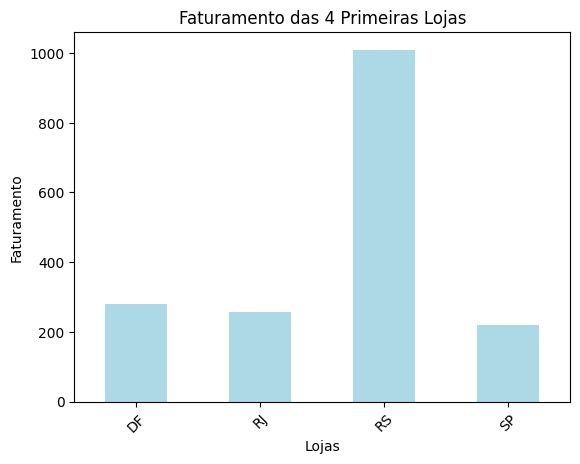

In [117]:
import matplotlib.pyplot as plt

df_quatro_lojas.groupby("Local da compra")["Preço"].sum().plot(kind='bar', color='lightblue')

plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.title("Faturamento das 4 Primeiras Lojas")
plt.xticks(rotation=45)

plt.show()

# 2. Vendas por Categoria


In [126]:
faturamento_por_categoria = df_total.groupby("Categoria do Produto")["Preço"].sum()

print(faturamento_por_categoria)

Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Preço, dtype: float64


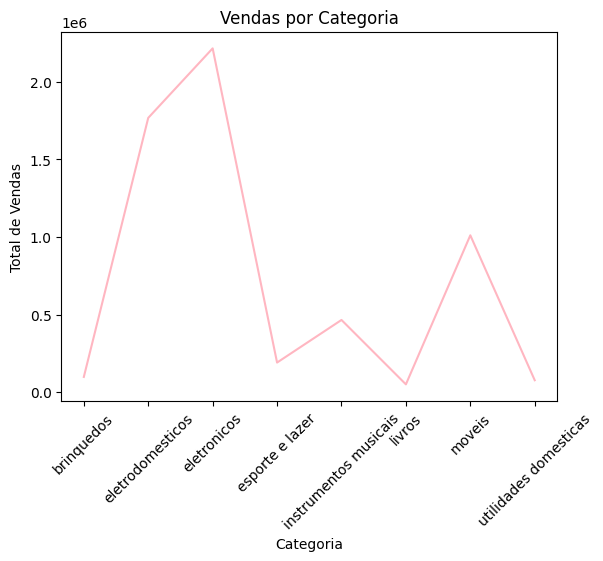

In [137]:
import matplotlib.pyplot as plt

faturamento_por_categoria.plot(kind='line', color='lightpink')

plt.xlabel("Categoria")
plt.ylabel("Total de Vendas")
plt.title("Vendas por Categoria")
plt.xticks(rotation=45)

plt.show()

# 3. Média de Avaliação das Lojas

In [81]:
avaliacao_medio_por_loja = df_total.groupby("Vendedor")["Avaliação da compra"].mean()
avaliacoes = [4.0, 1.0, 1.0, 4.0, 5.0]

media_avaliacao = sum(avaliacoes) / len(avaliacoes)

print(f"A média das avaliações é: {media_avaliacao:.2f}")


A média das avaliações é: 3.00


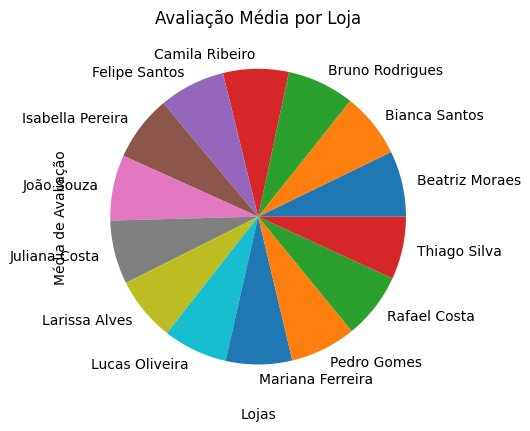

In [134]:
import matplotlib.pyplot as plt


df_total.groupby("Vendedor")["Avaliação da compra"].mean().plot(kind='pie', color='violet')


plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.title("Avaliação Média por Loja")
plt.xticks(rotation=45)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [131]:
mais_vendidos = df_total.groupby("Produto")["Avaliação da compra"].sum().nlargest(5)

print(mais_vendidos)

menos_vendidos = df_total.groupby("Produto")["Avaliação da compra"].sum().nsmallest(5)

print(menos_vendidos)

Produto
Cômoda                      851
Carrinho controle remoto    844
Bateria                     839
Blocos de montar            818
Micro-ondas                 815
Name: Avaliação da compra, dtype: int64
Produto
Headset               617
Celular ABXY          636
Jogo de copos         651
Mochila               654
Assistente virtual    655
Name: Avaliação da compra, dtype: int64


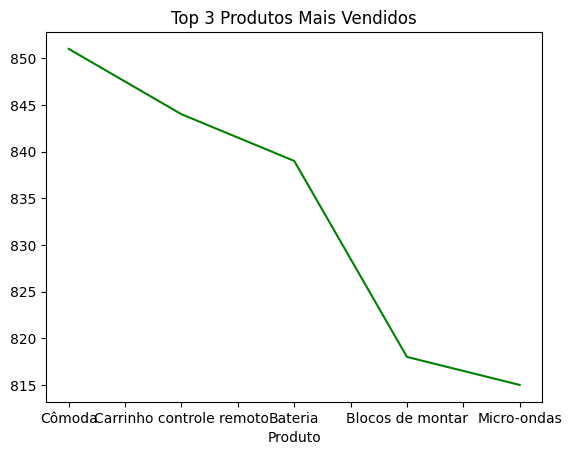

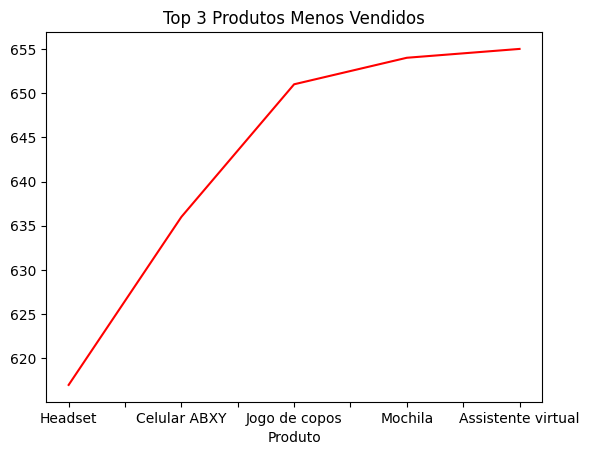

In [133]:
import matplotlib.pyplot as plt

# Gráfico dos mais vendidos
mais_vendidos.plot(kind='line', color='green', title="Top 5 Produtos Mais Vendidos")
plt.show()

# Gráfico dos menos vendidos
menos_vendidos.plot(kind='line', color='red', title="Top 5 Produtos Menos Vendidos")
plt.show()

# 5. Frete Médio por Loja


In [50]:

frete_medio_por_loja = df_total.groupby("Vendedor")["Frete"].mean()
Frete = [9.249790, 11.234305, 21.262681, 54.667344, 26.964689]

media_frete = sum(Frete) / len(Frete)

print(f"A média dos fretes é: {media_frete:.2f}")


A média dos fretes é: 24.68


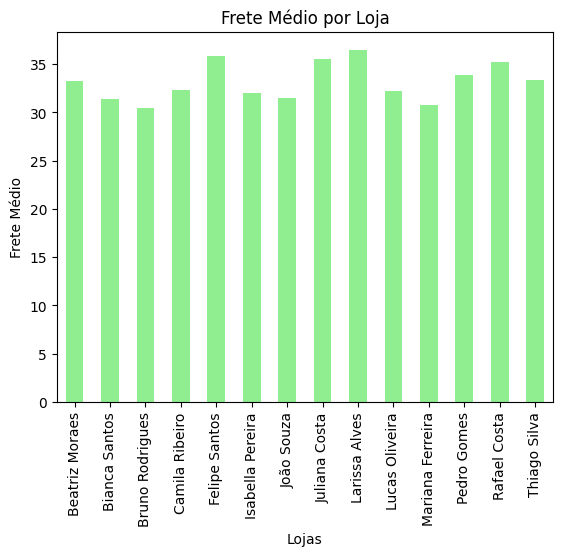

In [136]:
import matplotlib.pyplot as plt

frete_medio_por_loja.plot(kind='bar', color='lightgreen')

plt.xlabel("Lojas")
plt.ylabel("Frete Médio")
plt.title("Frete Médio por Loja")
plt.show()

**Relatório**


*   Loja que deve ser vendida: a loja 2 da vendedora João Souza;
*   Melhor loja: a loja 5 da Larissa Alves;

  A loja do João Souza (loja 2), deve ser fechada pois é a que tem menos faturamento e menor aprovação dos clientes, sendo o contrario da loja da Larissa Alves que por sua vez, tem maior faturamento e avaliação.
